# Time Analysis

- First, we will create a pandas dataframe including the map, start and goal point and the average time of execution for the 3 algorithms. 
- The average time was calculated by using 5 samples for each algorithm. We have ignored outliners.
- For each map, we have 2 results. In the first one, the start point is at the upper left side of the map and the goal is at the bottom right side of the map. The opposite for the second result.

- It was performed in equal conditions for the 3 algorithms, this means with no extra functions implemented so none of them took extra time executing those functions.


- Map 5 and 7 are the same, we just used map 5. 

- Map 12 is very similar to map 5 but with more obstacles.

In [7]:
import pandas as pd
import seaborn as sns

### Creating data:

In [18]:
# Column's names
col = ['MAP', 'START_X','START_Y','END_X','END_Y','TIME_BFS', 'TIME_DFS','TIME_BUG2']
data =[    
    [1,1,1,7,2,0.998,1.994,1.013],
    [1,7,2,1,1,0.998,3.323,1.977],
    [2,2,2,10,7,2.992,4.005,4.480],
    [2,10,7,2,2,2.490,4.960,5.987],
    [3,4,10,4,14,81.114,110.052,15.850],
    [3,4,14,4,10,78.102,49.366,11.996],
    [4,4,10,4,14,187.4548,148.477,606.814],
    [4,4,14,4,10,246.115,62.6105,929.015],
    [5,1,1,15,20,258.846,164.640,9.970],
    [5,15,20,1,1,461.383,412.822,745.433],
    [6,2,2,10,17,8.477,6.965,11.963],
    [6,10,17,2,2,8.31,10.950,10.973],
    [8,2,2,10,17,10.567,4.03,14.926],
    [8,10,17,2,2,8.965,10.962,1.994],
    [9,1,4,20,15,387.523,282.421,5.981],
    [9,20,15,1,4,511.363,315.934,4.985],
    #[10,1,4,1,15,1011.231,1096.214,2721.211],
    #[10,1,15,1,4,1061.381,695.345,2680.750],
    [11,1,1,14,20,470.004,114.156,8.968],
    [11,14,20,1,1,875.4655,611.467,8.003],
    [12,1,1,15,20,212.765,57.460,7.987],
    [12,15,20,1,1,412.8351,275.042,554.918]    
      ]
# Create a datafram using the column's names and the data.
df = pd.DataFrame(data,columns=col)
# Show me how it looks!
df

,MAP,START_X,START_Y,END_X,END_Y,TIME_BFS,TIME_DFS,TIME_BUG2
0,1,1,1,7,2,0.9980,1.9940,1.013
1,1,7,2,1,1,0.9980,3.3230,1.977
2,2,2,2,10,7,2.9920,4.0050,4.480
3,2,10,7,2,2,2.4900,4.9600,5.987
4,3,4,10,4,14,81.1140,110.0520,15.850
5,3,4,14,4,10,78.1020,49.3660,11.996
6,4,4,10,4,14,187.4548,148.4770,606.814
7,4,4,14,4,10,246.1150,62.6105,929.015
8,5,1,1,15,20,258.8460,164.6400,9.970
9,5,15,20,1,1,461.3830,412.8220,745.433


Even before analyzing the data, some simple observations can be made. 

- **BFS algorithms:** You can see that generally as the map gets larger the BFS will take longer to run.
- **Greedy algorithms:** In this type of algorithm we see how such a regular structure is not followed. Regardless of the complexity of the map, there are cases where it takes a long time and cases where it takes very little time. This is because the greedy algorithm has worked as it should, that is, it makes optimal decisions locally, expecting it to be a global optimal solution, which in some cases will work like this and in other cases it will entangle us too much in the map.

#

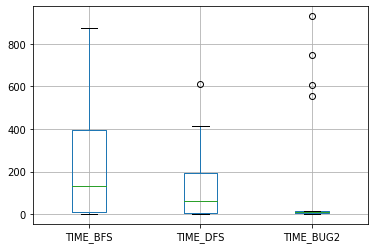

In [19]:
boxplot = df.boxplot(column=['TIME_BFS', 'TIME_DFS','TIME_BUG2'])

In [10]:
col

['MAP',
 'START_X',
 'START_Y',
 'END_X',
 'END_Y',
 'TIME_BFS',
 'TIME_DFS',
 'TIME_BUG2']